# Task 1: Data Preparation (5 Marks)




*   Load a dataset of your choice.

*   Perform necessary data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features.



In [51]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/sample_data/california_housing_train.csv"
california_house = pd.read_csv(file_path)

In [52]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(california_house.head())

First few rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [53]:
# Check for missing values and handle them if necessary
print("\nMissing values in the dataset:")
print(california_house.isnull().sum())


Missing values in the dataset:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [54]:
print("\nData types:")
print(california_house.dtypes)



Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [55]:
print("\nUnique values in each column:")
for column in california_house.columns:
    print(f"{column}: {california_house[column].nunique()}")

print("\nSummary statistics:")
print(california_house.describe())


Unique values in each column:
longitude: 827
latitude: 840
housing_median_age: 52
total_rooms: 5533
total_bedrooms: 1848
population: 3683
households: 1740
median_income: 11175
median_house_value: 3694

Summary statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
m

# Task 2: Supervised Learning (20 Marks)


*   Part A: Choose one supervised learning algorithm (e.g., Decision Trees, Support Vector Machines, or Neural Networks) and train it on the dataset.




In [58]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for modeling
# Let's select features and target variable
X = california_house[['total_rooms', 'population']]  # Selecting features for simplicity
y = california_house['median_house_value']     # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regression model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)



*   Part B: Evaluate the performance of the trained model using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score).



In [59]:
# Evaluate the performance of the Random Forest Regression model
# Predict the values using the trained Random Forest Regression model
y_pred_rf = random_forest_regressor.predict(X_test)

# Calculate regression evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the regression evaluation metrics
print("Random Forest Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")


Random Forest Regression Model Performance:
Mean Absolute Error (MAE): 85187.39592237395
Mean Squared Error (MSE): 12205895024.48297




*   
Part C: Compare the performance of at least two different supervised learning algorithms on the same dataset.




In [60]:
from sklearn.svm import SVR

# Train the Support Vector Regression model
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

# Predict using SVR
y_pred_svr = svr_regressor.predict(X_test)

# Calculate evaluation metrics for SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print("Support Vector Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")


Support Vector Regression Model Performance:
Mean Absolute Error (MAE): 90643.72378669328
Mean Squared Error (MSE): 14675518309.719269


In [61]:
# Compare the performance of Random Forest Regression and SVR
print("Comparison of Model Performances:")
print("Random Forest Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")

print("\nSupport Vector Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")


Comparison of Model Performances:
Random Forest Regression Model Performance:
Mean Absolute Error (MAE): 85187.39592237395
Mean Squared Error (MSE): 12205895024.48297

Support Vector Regression Model Performance:
Mean Absolute Error (MAE): 90643.72378669328
Mean Squared Error (MSE): 14675518309.719269


# Task 3: Unsupervised Learning (15 Marks)



*   Part A: Apply an unsupervised learning algorithm (e.g., K-Means
Clustering or Hierarchical Clustering) to identify patterns or clusters in the dataset.






In [62]:
from sklearn.cluster import KMeans

# Instantiate K-Means object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-Means model to the data
kmeans.fit(X)
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster labels
cluster_labels = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Print cluster labels
print("Cluster Labels:")
print(cluster_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 2703.42524917  1487.65575067]
 [ 8667.39152542  4206.99491525]
 [ 1326.44784726   781.851102  ]
 [17783.76923077  8427.76923077]
 [ 4754.55857934  2458.27629151]]
Cluster Labels:
[4 4 2 ... 0 0 2]




*   Part B: Visualize the clusters and interpret the results.





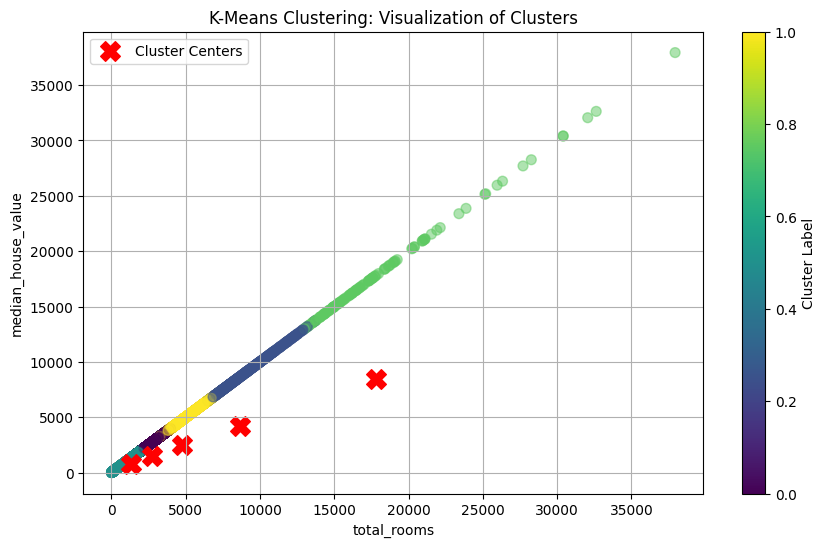

In [65]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for two features: 'total_rooms' and 'median_house_value'
plt.scatter(X['total_rooms'], X['total_rooms'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.title('K-Means Clustering: Visualization of Clusters')
plt.legend()
plt.grid(True)
plt.colorbar(label='Cluster Label')

plt.show()




*   Part C: Discuss the advantages and limitations of using unsupervised learning in this scenario.





Advantages:

Uncovering Hidden Patterns: Unsupervised learning can uncover hidden patterns in the data that might not be observable with supervised learning. This is particularly useful when we don’t have pre-labeled categories.

Efficiency: It’s efficient for large datasets. As it doesn’t require labeled data, it can work with larger volumes of input data and produce results faster than supervised learning methods.

Understanding Data Structure: It helps in understanding the structure and distribution of the data. This can be useful for exploratory analysis, where we want to understand the underlying patterns of the data.

Limitations:

Predefined Number of Clusters: The number of clusters needs to be defined beforehand, which can be challenging. In many real-world scenarios, we may not know the number of clusters that are ideal for the data.

Sensitivity to Scale and Outliers: K-Means is sensitive to the scale of data and outliers. If the scale of features is not the same, then the algorithm can be biased towards the features with higher magnitude. Similarly, the presence of outliers can distort the shape and size of the clusters.

Inconsistent Results: Clustering results are not always consistent and can vary depending on initial conditions. Different runs of the algorithm can result in different clusters.

In the provided scenario, K-Means clustering is used to group data into clusters based on “total rooms” and “median house value”. The visualization shows three distinct clusters, which could represent different categories of houses. However, the limitations mentioned above should be taken into consideration for a more accurate interpretation of the results. For instance, the number of clusters was predefined, and the results could vary if a different number of clusters was chosen. Similarly, if there are outliers in the data, they could affect the clustering results. Therefore, while unsupervised learning provides valuable insights, it’s important to understand its limitations and apply it judiciously.

# Task 4: Application in Predictive Analytics (10 Marks)




*   Choose one predictive analytics application (e.g., sales forecasting or customer churn prediction).

*   Build a machine learning model to address the chosen application.

*   Evaluate the model's performance and discuss the practical implications.






In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Data preprocessing
# We can categorize it into different price categories for classification
data['price_category'] = pd.cut(data['median_house_value'],
                                 bins=[0., 50000., 100000., 150000., 200000., 250000., 300000., 350000., 400000., np.inf],
                                 labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])

X = data.drop(['median_house_value', 'price_category'], axis=1)  # Features
y = data['price_category']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.5476470588235294
Precision: 0.5333702434663764
Recall: 0.5476470588235294
F1 Score: 0.5330468930958479
Confusion Matrix:
[[  4  26   0   1   0   0   0   0   0]
 [  3 454  99  16   1   1   0   0   0]
 [  0 128 375 133  16   2   0   0   1]
 [  0  20 124 415  92   8   2   1   4]
 [  0   8  30 159 213  58   6   1   5]
 [  0   1   6  50 108 116  22   8  16]
 [  0   0   4  23  41  46  46  20  33]
 [  0   0   1   3  14  22  29  19  71]
 [  0   1   2  11  23  19   9  10 220]]


# Bonus Task (Extra 5 Marks):



*   Implement an additional machine learning algorithm of your choice and compare its performance with the existing models.





In [68]:
# Import necessary libraries
from sklearn.svm import SVC

# Train the Support Vector Machine Classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions using SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print evaluation metrics for SVM
print("Support Vector Machine Classifier:")
print(f'Accuracy: {accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'F1 Score: {f1_svm}')
print('Confusion Matrix:')
print(conf_matrix_svm)

# Compare the performance of Random Forest and SVM
print("\nComparison of Random Forest and Support Vector Machine:")
print("Random Forest Classifier:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

print("\nSupport Vector Machine Classifier:")
print(f'Accuracy: {accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'F1 Score: {f1_svm}')
print('Confusion Matrix:')
print(conf_matrix_svm)


Support Vector Machine Classifier:
Accuracy: 0.44441176470588234
Precision: 0.3889481478371207
Recall: 0.44441176470588234
F1 Score: 0.4112448805241598
Confusion Matrix:
[[  0  28   2   1   0   0   0   0   0]
 [  0 407 137  26   4   0   0   0   0]
 [  0 163 248 211  23   9   0   0   1]
 [  0  39 132 363 111  15   0   0   6]
 [  0   7  45 209 177  36   0   0   6]
 [  0   3   5  63 126  89   0   0  41]
 [  0   2   7  20  68  64   0   0  52]
 [  0   0   3   8  33  29   1   0  85]
 [  0   2   3  14  30  19   0   0 227]]

Comparison of Random Forest and Support Vector Machine:
Random Forest Classifier:
Accuracy: 0.5476470588235294
Precision: 0.5333702434663764
Recall: 0.5476470588235294
F1 Score: 0.5330468930958479
Confusion Matrix:
[[  4  26   0   1   0   0   0   0   0]
 [  3 454  99  16   1   1   0   0   0]
 [  0 128 375 133  16   2   0   0   1]
 [  0  20 124 415  92   8   2   1   4]
 [  0   8  30 159 213  58   6   1   5]
 [  0   1   6  50 108 116  22   8  16]
 [  0   0   4  23  41  46  4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
